In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.utils import resample

N-BaIoT is a publicbly available dataset which is gathered using 9 commercial IoT devices. This dataset is created by gathering network traffic data originating from IoT devices that have been compromised by BASHLITE and Mirai botnets. The BASHLITE attacks encompass various types such as Scan, Junk, UDP, TCP, and COMBO, while Mirai attacks consist of Scan, Ack, Syn, UDP, and UDPplain. For this project, the records gathered using last IoT device named "SimpleHome_XCS7_1003_WHT_Security_Camera" is utilized. For this work, the dataset is divided into 2 subjects for running two different types of classification tasks. The two subsets are:

+ DS1: The first subset is categorized into two classes: Normal and Malicious. (Binary Classification - 2 Classes) 
+ DS2: The second subset is divided into three categories: Normal, Bashlite, and Mirai. (Muticlass Classification - 3 Classes) 


# Data Pre-Processing - DS1

In [2]:
benign_df = pd.read_csv("./Dataset /9.benign.csv")

In [3]:
benign_df["label"] = "Normal"

In [4]:
benign_df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Normal
1,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.061357,60.000000,9.540000e-07,60.000000,9.090000e-13,0.0,0.0,Normal
2,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Normal
3,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,...,0.0,0.0,5.832783,388.850426,9.199164e+01,388.850426,8.462461e+03,0.0,0.0,Normal
4,1.927179,590.0,0.0,1.955648,590.0,0.0,1.984992,590.0,0.0,1.998489,...,0.0,0.0,6.831901,418.293119,1.108120e+02,418.293119,1.227931e+04,0.0,0.0,Normal


In [5]:
malicious_traffic_csv = [file for file in glob.glob("./Dataset /*.csv") if "benign" not in file.lower()]

In [6]:
malicious_traffic_csv

['./Dataset /9.mirai.syn.csv',
 './Dataset /9.mirai.ack.csv',
 './Dataset /9.gafgyt.tcp.csv',
 './Dataset /9.mirai.scan.csv',
 './Dataset /9.gafgyt.scan.csv',
 './Dataset /9.mirai.udpplain.csv',
 './Dataset /9.gafgyt.combo.csv',
 './Dataset /9.gafgyt.junk.csv',
 './Dataset /9.mirai.udp.csv',
 './Dataset /9.gafgyt.udp.csv']

In [7]:
malicious_traffic_list = []
for files in malicious_traffic_csv:
    malicious_traffic_df = pd.read_csv(files)
    malicious_traffic_list.append(malicious_traffic_df)

In [8]:
len(malicious_traffic_list)

10

In [9]:
malicious_traffic_df = pd.concat(malicious_traffic_list, axis = 0, ignore_index = True)

In [10]:
malicious_traffic_df["label"] = "Malicious"

In [12]:
malicious_traffic_df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,74.0,0.000000e+00,1.000000,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Malicious
1,1.995653,74.0,0.000000e+00,1.997390,74.0,1.818989e-12,1.999129,74.0,0.000000e+00,1.999913,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Malicious
2,2.984032,74.0,0.000000e+00,2.990403,74.0,1.818989e-12,2.996795,74.0,9.094947e-13,2.999679,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Malicious
3,3.952494,74.0,0.000000e+00,3.971399,74.0,1.818989e-12,3.990434,74.0,0.000000e+00,3.999042,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Malicious
4,4.931439,74.0,9.094947e-13,4.958692,74.0,1.818989e-12,4.986173,74.0,9.094947e-13,4.998615,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,Malicious


In [13]:
combined_df1 = pd.concat([benign_df, malicious_traffic_df])

In [14]:
combined_df1.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Normal
1,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.061357,60.000000,9.540000e-07,60.000000,9.090000e-13,0.0,0.0,Normal
2,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Normal
3,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,...,0.0,0.0,5.832783,388.850426,9.199164e+01,388.850426,8.462461e+03,0.0,0.0,Normal
4,1.927179,590.0,0.0,1.955648,590.0,0.0,1.984992,590.0,0.0,1.998489,...,0.0,0.0,6.831901,418.293119,1.108120e+02,418.293119,1.227931e+04,0.0,0.0,Normal


In [16]:
DS1 = combined_df1.sample(frac=1).reset_index(drop=True)

In [18]:
DS1.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,82.531361,517.769208,16585.340751,157.865028,481.974448,30392.940964,567.152853,439.927594,43338.456254,6263.061448,...,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0,Malicious
1,147.718513,363.027353,57869.935664,213.185266,387.986428,54450.198430,578.177181,411.543138,50079.730079,5949.421197,...,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0,Malicious
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.0,60.0,0.0,0.0,0.0,Malicious
3,103.949150,78.995408,3977.395274,138.780147,83.184682,7437.801102,231.985353,87.796173,11168.635177,969.765479,...,0.0,0.0,1.979334,74.0,0.0,74.0,0.0,0.0,0.0,Malicious
4,184.260876,68.238021,47.467305,263.832958,69.277530,43.812858,681.301305,70.332662,37.893366,6476.317868,...,0.0,0.0,1.000000,74.0,0.0,74.0,0.0,0.0,0.0,Malicious


# Data Pre-Processing: DS2


In [19]:
bashlite_files = glob.glob("./Dataset /*.gafgyt*.csv")

In [20]:
bashlite_files

['./Dataset /9.gafgyt.tcp.csv',
 './Dataset /9.gafgyt.scan.csv',
 './Dataset /9.gafgyt.combo.csv',
 './Dataset /9.gafgyt.junk.csv',
 './Dataset /9.gafgyt.udp.csv']

In [21]:
bashlite_list = []
for files in bashlite_files:
    bashlite_df = pd.read_csv(files)
    bashlite_list.append(bashlite_df)

In [22]:
bashlite_df = pd.concat(bashlite_list, axis = 0, ignore_index = True)

In [23]:
bashlite_df["label"] = "Bashlite"

In [29]:
mirai_files = glob.glob("./Dataset /*.mirai*.csv")

In [30]:
mirai_files

['./Dataset /9.mirai.syn.csv',
 './Dataset /9.mirai.ack.csv',
 './Dataset /9.mirai.scan.csv',
 './Dataset /9.mirai.udpplain.csv',
 './Dataset /9.mirai.udp.csv']

In [31]:
mirai_list = []
for files in mirai_files:
    mirai_df = pd.read_csv(files)
    mirai_list.append(mirai_df)

In [32]:
mirai_df = pd.concat(mirai_list, axis = 0, ignore_index = True)

In [33]:
mirai_df["label"] = "Mirai"

In [34]:
combined_df2 = pd.concat([benign_df, bashlite_df, mirai_df])

In [35]:
DS2 = combined_df2.sample(frac=1).reset_index(drop=True)

In [37]:
DS2.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,112.030123,475.660751,32562.526241,201.981353,448.145348,41086.440308,635.555741,429.882073,45899.719195,6255.478685,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,Mirai
1,32.662161,74.234626,5.575985,40.638902,74.332343,7.866455,88.758511,74.499291,75.268434,797.078734,...,0.0,0.0,1.979370,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,Bashlite
2,188.229051,63.859949,39.140078,246.485643,65.743026,47.420017,631.843628,68.974964,45.099516,6415.078247,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,Mirai
3,68.571870,416.731090,48099.235942,138.330709,388.878985,53640.015364,504.130094,384.996446,54449.915797,5863.837219,...,0.0,0.0,15376.009215,554.0,0.000013,554.0,1.746230e-10,0.0,0.0,Mirai
4,36.038009,60.000397,0.011909,50.354302,60.006190,0.184978,165.775399,60.056632,1.622484,1868.136958,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,Mirai


# Exploratoty Data Analysis (EDA) - DS1 & DS2

In [39]:
missing_values = DS1.isnull()
missing_values_count = missing_values.sum()

if missing_values_count.sum() == 0:
    print("There are no missing values in the DS1.")
else:
    print("Missing values in the DS1:")
    print(missing_values_count)

There are no missing values in the DS1.


In [45]:
DS1.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,850826.000000,850826.000000,8.508260e+05,850826.000000,850826.000000,8.508260e+05,850826.000000,850826.000000,850826.000000,850826.000000,...,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000
mean,98.267421,217.703235,1.630061e+04,157.310067,217.281892,1.798373e+04,451.984966,216.745867,19584.994464,4200.983257,...,126.320362,2.422651,0.000051,1300.955911,216.236807,0.162011,219.367660,166.705960,3.276070,-0.000379
std,69.820806,186.657549,2.324521e+04,110.721784,181.888014,2.339461e+04,314.962663,177.097290,23637.415247,2918.960456,...,4190.332407,556.762383,0.010928,5267.027544,225.507277,4.266169,226.700814,5900.757300,1360.191527,0.026018
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000,-37601.681020,-0.587497,1.000000,60.000000,0.000000,60.000000,0.000000,-68855.092130,-1.137592
25%,1.000021,60.000000,4.547474e-13,1.001654,60.000000,1.364242e-12,1.165747,60.000009,0.000078,2.901582,...,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000
50%,113.937651,74.036305,3.333553e+01,190.754000,74.052170,3.720039e+01,589.447259,74.117649,39.892104,5781.952998,...,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000,0.000000
75%,153.322975,399.601699,3.396891e+04,244.793540,407.418216,4.021541e+04,685.369245,418.159054,45720.413445,6475.322401,...,0.000000,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000,0.000000,0.000000
max,438.002839,886.166851,1.738886e+05,505.805302,846.320306,1.731848e+05,1210.948467,709.725273,173077.043447,8946.997229,...,480808.294900,69895.058490,0.956099,29932.352278,909.000000,220.178576,1278.265351,479368.980762,143864.110900,1.531981


In [42]:
DS1_data_count = pd.value_counts(DS1['label'], sort = True)
DS1_data_percentage = pd.value_counts(DS1["label"], normalize=True).mul(100).round(1).astype(str) + '%'

In [43]:
pd.concat([DS1_data_count,DS1_data_percentage], axis=1, keys=['Counts', '%'])

,Counts,%
Malicious,831298,97.7%
Normal,19528,2.3%


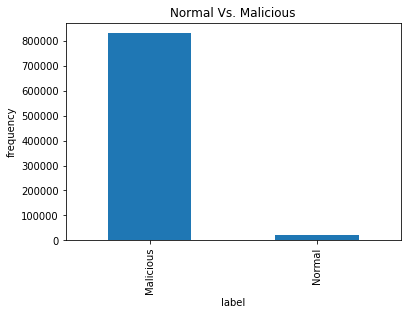

In [44]:
DS1_data_count.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Normal Vs. Malicious")
plt.xlabel('label')
plt.ylabel('frequency')
plt.show()

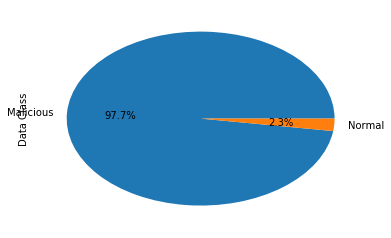

In [55]:
DS1.groupby('label').size().plot(kind='pie',
                                 y = "label",
                                 label = "Data Class",
                                 autopct='%1.1f%%')

In [46]:
missing_values = DS2.isnull()
missing_values_count = missing_values.sum()

if missing_values_count.sum() == 0:
    print("There are no missing values in the DS2.")
else:
    print("Missing values in the DS2:")
    print(missing_values_count)

There are no missing values in the DS2.


In [47]:
DS2.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,850826.000000,850826.000000,8.508260e+05,850826.000000,850826.000000,8.508260e+05,850826.000000,850826.000000,850826.000000,850826.000000,...,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000,850826.000000
mean,98.267421,217.703235,1.630061e+04,157.310067,217.281892,1.798373e+04,451.984966,216.745867,19584.994464,4200.983257,...,126.320362,2.422651,0.000051,1300.955911,216.236807,0.162011,219.367660,166.705960,3.276070,-0.000379
std,69.820806,186.657549,2.324521e+04,110.721784,181.888014,2.339461e+04,314.962663,177.097290,23637.415247,2918.960456,...,4190.332407,556.762383,0.010928,5267.027544,225.507277,4.266169,226.700814,5900.757300,1360.191527,0.026018
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000,-37601.681020,-0.587497,1.000000,60.000000,0.000000,60.000000,0.000000,-68855.092130,-1.137592
25%,1.000021,60.000000,4.547474e-13,1.001654,60.000000,1.364242e-12,1.165747,60.000009,0.000078,2.901582,...,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000
50%,113.937651,74.036305,3.333553e+01,190.754000,74.052170,3.720039e+01,589.447259,74.117649,39.892104,5781.952998,...,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000,0.000000
75%,153.322975,399.601699,3.396891e+04,244.793540,407.418216,4.021541e+04,685.369245,418.159054,45720.413445,6475.322401,...,0.000000,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000,0.000000,0.000000
max,438.002839,886.166851,1.738886e+05,505.805302,846.320306,1.731848e+05,1210.948467,709.725273,173077.043447,8946.997229,...,480808.294900,69895.058490,0.956099,29932.352278,909.000000,220.178576,1278.265351,479368.980762,143864.110900,1.531981


In [48]:
DS2_data_count = pd.value_counts(DS2['label'], sort = True)
DS2_data_percentage = pd.value_counts(DS2["label"], normalize=True).mul(100).round(1).astype(str) + '%'

In [49]:
pd.concat([DS2_data_count,DS2_data_percentage], axis=1, keys=['Counts', '%'])

,Counts,%
Mirai,514860,60.5%
Bashlite,316438,37.2%
Normal,19528,2.3%


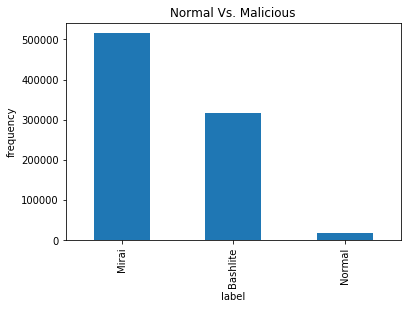

In [53]:
DS2_data_count.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Normal Vs. Malicious")
plt.xlabel('label')
plt.ylabel('frequency')
plt.show()

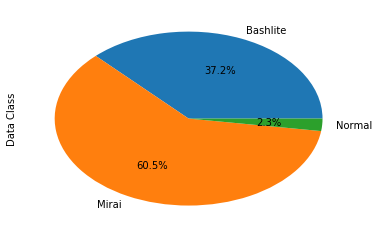

In [54]:
DS2.groupby('label').size().plot(kind='pie',
                                 y = "label",
                                 label = "Data Class",
                                 autopct='%1.1f%%')

It is clearly evident that the dataset is highly imbalanced with only 2.3% normal records that can pose a challenge for machine learning classification because the model can become biased towards the majority class, leading to poor performance in detecting the minority class. This imbalance can result in low sensitivity (high false negatives) and overestimation of the model's accuracy. To address this problem, undersampling is employed, which involves reducing the number of records in the majority class to match the quantity of the minority class.

# Undersampling: DS1

In [61]:
DS1_count = DS1['label'].value_counts()
lowest_label_DS1 = DS1_count.idxmin()  # Find the label with the lowest count

undersampled_dfs = []
for label in DS1_count.index:
    if label == lowest_label_DS1:
        continue
    df_label = DS1[DS1['label'] == label].sample(n=DS1_count[lowest_label_DS1], random_state=42)
    undersampled_dfs.append(df_label)

undersampled_dfs.append(DS1[DS1['label'] == lowest_label_DS1])
undersampled_df_DS1 = pd.concat(undersampled_dfs).sample(frac=1).reset_index(drop=True)

In [62]:
DS1_data_count_undersampled = pd.value_counts(undersampled_df_DS1['label'], sort = True)
DS1_data_percentage_undersampled = pd.value_counts(undersampled_df_DS1["label"], normalize=True).mul(100).round(1).astype(str) + '%'

In [74]:
pd.concat([DS1_data_count_undersampled,DS1_data_percentage_undersampled], axis=1, keys=['Counts', '%'])

,Counts,%
Malicious,19528,50.0%
Normal,19528,50.0%


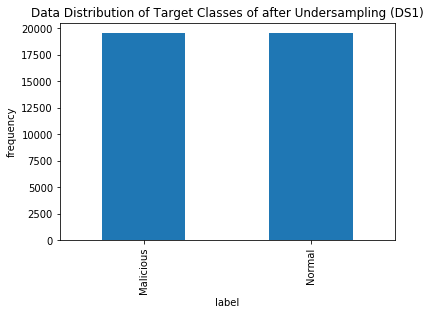

In [67]:
DS1_data_count_undersampled.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('label')
plt.ylabel('frequency')
plt.title("Data Distribution of Target Classes of after Undersampling (DS1)")
plt.show()

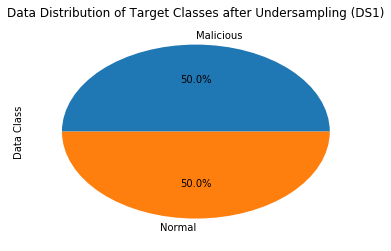

In [68]:
undersampled_df_DS1.groupby('label').size().plot(kind='pie',
                                 y = "label",
                                 label = "Data Class",
                                 autopct='%1.1f%%')

plt.title("Data Distribution of Target Classes after Undersampling (DS1)")
plt.show()

In [69]:
undersampled_df_DS1.to_csv("DS1_Undersampled.csv", index = False)

In [71]:
data1 = pd.read_csv("DS1_Undersampled.csv")
data1.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,330.0,0.000000e+00,1.000000,330.0,0.000000e+00,1.000001,329.999744,0.069104,1.733125,...,6.630000e-66,0.000000e+00,6.218105,330.0,0.000005,431.49044,2.910000e-11,-6.260000e-29,0.000000e+00,Normal
1,1.975937,330.0,0.000000e+00,1.985492,330.0,2.320000e-08,1.995228,329.988187,3.189306,3.181198,...,-1.650000e-37,0.000000e+00,6.276740,330.0,0.000005,431.49044,3.250000e-11,1.560000e-27,7.600000e-17,Normal
2,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.00000,0.000000e+00,0.000000e+00,0.000000e+00,Malicious
3,1.999903,330.0,1.460000e-11,1.999942,330.0,0.000000e+00,1.999981,329.999878,0.032854,2.729836,...,4.660000e-33,3.200000e-22,6.259297,330.0,0.000008,431.49044,5.820000e-11,2.440000e-28,0.000000e+00,Normal
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.00000,0.000000e+00,0.000000e+00,0.000000e+00,Malicious


In [73]:
DS2_count = DS2['label'].value_counts()
lowest_label_DS2 = DS2_count.idxmin()  # Find the label with the lowest count

undersampled_dfs = []
for label in DS2_count.index:
    if label == lowest_label_DS2:
        continue
    df_label = DS2[DS2['label'] == label].sample(n=DS2_count[lowest_label_DS2], random_state=42)
    undersampled_dfs.append(df_label)

undersampled_dfs.append(DS2[DS2['label'] == lowest_label_DS2])
undersampled_df_DS2 = pd.concat(undersampled_dfs).sample(frac=1).reset_index(drop=True)

In [75]:
DS2_data_count_undersampled = pd.value_counts(undersampled_df_DS2['label'], sort = True)
DS2_data_percentage_undersampled = pd.value_counts(undersampled_df_DS2["label"], normalize=True).mul(100).round(1).astype(str) + '%'

In [76]:
pd.concat([DS2_data_count_undersampled,DS2_data_percentage_undersampled], axis=1, keys=['Counts', '%'])

,Counts,%
Normal,19528,33.3%
Mirai,19528,33.3%
Bashlite,19528,33.3%


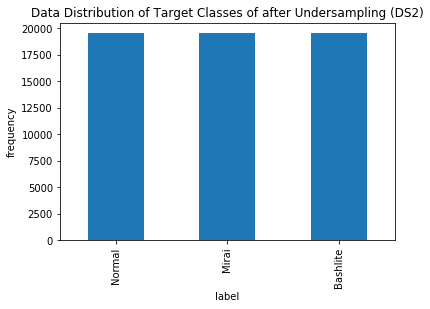

In [78]:
DS2_data_count_undersampled.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('label')
plt.ylabel('frequency')
plt.title("Data Distribution of Target Classes of after Undersampling (DS2)")
plt.show()

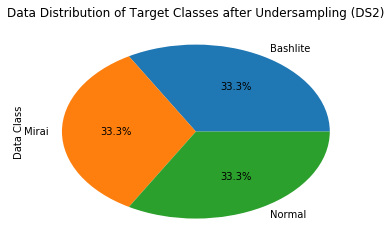

In [79]:
undersampled_df_DS2.groupby('label').size().plot(kind='pie',
                                 y = "label",
                                 label = "Data Class",
                                 autopct='%1.1f%%')

plt.title("Data Distribution of Target Classes after Undersampling (DS2)")
plt.show()

In [80]:
undersampled_df_DS2.to_csv("DS2_Undersampled.csv", index = False)

In [81]:
data2 = pd.read_csv("DS2_Undersampled.csv")
data2.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,217.430607,69.927857,41.672754,312.117105,70.815743,36.191715,790.226676,71.214053,33.431396,6146.799451,...,0.000000e+00,0.0,1.000000,60.0,0.0,60.00000,0.0,0.000000e+00,0.0,Mirai
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,1.000000,60.0,0.0,60.00000,0.0,0.000000e+00,0.0,Bashlite
2,186.963011,74.010871,0.832472,301.933853,74.024088,6.277083,857.694679,74.493290,355.524761,6802.713824,...,0.000000e+00,0.0,1.000000,74.0,0.0,74.00000,0.0,0.000000e+00,0.0,Bashlite
3,100.820052,353.463177,58850.173194,159.838076,395.223069,53225.690159,469.819341,408.954748,50614.229184,5118.481252,...,0.000000e+00,0.0,1.000000,60.0,0.0,60.00000,0.0,0.000000e+00,0.0,Mirai
4,1.999893,330.000000,0.000000,1.999936,330.000000,0.000000,1.999980,329.999854,0.039331,2.779422,...,-2.440000e-97,0.0,6.275344,330.0,0.0,431.49044,0.0,-1.110000e-27,0.0,Normal
